深く長く のテストデータ結果
Euclidの場合
深く短く : 0.5061263558505589
浅く短く : 0.43966774921146445
深く長く : 0.39807271594300325
浅く長く : 0.3040754969183462
Pearsonの場合
浅く短く : 0.8811307070049653
深く短く : 0.8622975859394845
深く長く : 0.8172977925228279
浅く長く : 0.8142583705889705


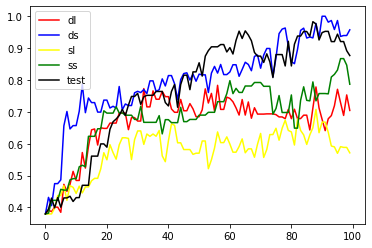

深く短く のテストデータ結果
Euclidの場合
深く短く : 0.5374979054036247
浅く短く : 0.39043696704377717
深く長く : 0.3705715093354298
浅く長く : 0.2811940280399307
Pearsonの場合
浅く長く : 0.8348688208866166
深く長く : 0.8279890298379443
深く短く : 0.8019398496060737
浅く短く : 0.7959456861169654


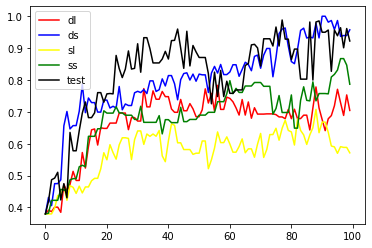

浅く長く のテストデータ結果
Euclidの場合
浅く長く : 0.6419731582278168
深く長く : 0.4388468119943335
浅く短く : 0.40865079764329487
深く短く : 0.27913907096744783
Pearsonの場合
深く短く : 0.805269206940265
浅く短く : 0.7973410661425592
浅く長く : 0.7793676254899359
深く長く : 0.761969723652907


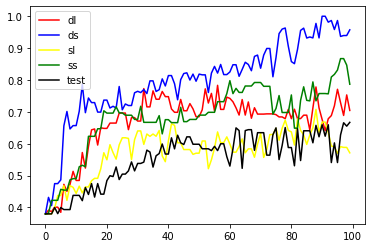

浅く短く のテストデータ結果
Euclidの場合
浅く短く : 0.6099223346447492
深く長く : 0.571329102448675
深く短く : 0.46986250948266123
浅く長く : 0.4092442444439726
Pearsonの場合
深く短く : 0.8899902403391544
浅く短く : 0.8464038849362076
浅く長く : 0.8278447728219992
深く長く : 0.8183765953295887


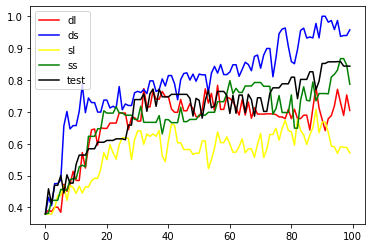

In [39]:
import math
import xlrd
import csv
import openpyxl
import matplotlib.pyplot as plt

label = []          #ラベル
ave_list = []       #平均値リスト
min_max = []        #平均値リスト各々の最低温度と最高温度・そのポインタのリスト
all_min_max = []    #平均値リスト全体の最低温度と最大温度
diff_temp = []      #各々の最低温度 - 全体の最低温度
min_max_100 = []    #list_100中の全体の最小最大リスト
list_100 = []       #平均値リスト各々の最低温度から100データ抜き出したリスト
list_100_a = []     #diff_temp適応後
min_max_master = [] #diff_temp適応後の最小値最大値
normalize_100 = []  #正規化リスト

euc_result = []     #ユークリッド結果
pea_result = []     #ピアソン結果

min_lb = 30015      #ラベルの最低温度
breathe = ["dl", "ds", "sl", "ss"]  #呼吸の分類
breathe_jp = ["深く長く", "深く短く", "浅く長く", "浅く短く"]  #呼吸の分類(日本語)
figure = []         #全体グラフ

#------------------------------------------------------------------------------------
#ラベルの作成
def make_Label():
    label.append(0)
    for i in range(0, 101):
        label.append(min_lb + 10*i)

#先頭行にラベルの挿入
def insert_Label(filename):
    with open(filename + ".csv", "r") as f:
        r = csv.reader(f)
        orig = list(r)
    
    with open(filename + "_out.csv", "w", newline='') as f:
        w = csv.writer(f)
        w.writerow(label)
        w.writerows(orig)
#------------------------------------------------------------------------------------
#平均の計算・保存とマスターcsvの作成
def calc_Average(filename):
    temp = []                   #マスターcsvに平均値追加後データを書き込むための一時リスト
    ave_list_elements = []      #平均値リストの配列要素(1次元)
    with open(filename + "_out.csv", "r") as f:
        r = csv.reader(f)
        for row in r:
            ave = 0
            counter = 0
            if row[1] == str(min_lb):
                continue;
            for i in range(1, len(label) - 1):
                ave += label[i] * int(row[i])
                counter += int(row[i])
            ave /= counter
            row[len(label)] = ave
            temp.append(row)
            
            ave_list_elements.append(ave)
            
        #平均値リストにデータ追加(2次元)
        ave_list.append(ave_list_elements)
    
    with open(filename + "_master.csv", "w", newline='') as f:
        w = csv.writer(f)
        w.writerow(label)
        w.writerows(temp)
#------------------------------------------------------------------------------------    
#正規化リストの作成
def normalization():
    
    #最小値最大値を求める
    def min_Max():
        
        for i in range(0, len(ave_list)):
            for j in range(0, len(ave_list[i])):
                if j == 0:
                    #最小値最大値
                    mini = ave_list[i][j]
                    maxi = ave_list[i][j]
                    #最小値最大値のポインタ
                    mini_p = j
                    maxi_p = j

                if ave_list[i][j] < mini:
                    mini = ave_list[i][j]
                    mini_p = j
                if ave_list[i][j] > maxi:
                    maxi = ave_list[i][j]
                    maxi_p = j
            
            #データ列ごとの最小最大値リストへの追加と全体の最小最大値を求める
            min_max.append([mini, maxi, mini_p, maxi_p])
            
        all_mini = min_max[0][0]
        all_maxi = min_max[0][1]
        for j in min_max:  
            if all_mini > j[0]:
                all_mini = mini
            if all_maxi < j[1]:
                all_maxi = maxi
        
        all_min_max.append(all_mini)
        all_min_max.append(all_maxi)
        
        #各々の最低温度と全体の最低温度の差を求める
        for j in min_max:
            diff_temp.append(j[0]- all_min_max[0])
        #最小値から100データ分の最大値探索
        mini_100 = ave_list[0][min_max[0][2]]
        maxi_100 = ave_list[0][min_max[0][2]]
        mini_100_p = 0
        maxi_100_p = 0
        for i in range(0, len(min_max)):
            for k in range(min_max[i][2], min_max[i][2] + 100):
                if ave_list[i][k] > maxi_100:
                    maxi_100 = ave_list[i][k]
                    maxi_100_p = i
                if ave_list[i][k] < mini_100:
                    mini_100 = ave_list[i][k]
                    mini_100_p = i
                    
        min_max_100.append(mini_100)
        min_max_100.append(maxi_100)
        min_max_100.append(mini_100_p)
        min_max_100.append(maxi_100_p)
    
    #diff_tempの適応と最大値を求め直す
    def diff_Adapt():
        
        counter = -1
        for l in ave_list:
            counter += 1
            temp_before = []
            temp_after = []
            for i in range(min_max[counter][2], min_max[counter][2] + 100):
                #100データ抜き出し保存
                temp_before.append(l[i])
                temp_after.append(l[i] - diff_temp[counter])
                
            list_100.append(temp_before)
            list_100_a.append(temp_after)
            
        maxi_after = list_100_a[0][0]
        for m in list_100_a:
            for n in range(0, len(m)):
                if m[n] > maxi_after:
                    maxi_after = m[n]
                    
        min_max_master.append(min_max_100[0])
        min_max_master.append(maxi_after)
    
    #正規化
    def extract_100(mm):
        
        for l in list_100_a:
            temp_normalized = []
            for i in l:
                #正規化
                temp_normalized.append((i - mm[0])/(mm[1]- mm[0]))
                
            normalize_100.append(temp_normalized)
            
        #デバッグ用
        #print("正規化")
        #print(normalize_100)
        #print("diff_temp適応の確認")
        #print(list_100[2][0])
        #print(list_100_a[2][0])
        #print("最小値最大値")
        #print(min_max)
        #print("各々の最低温度 - 全体の最低温度")
        #print(diff_temp)
        #print("100データ内の最小最大")
        #print(min_max_100)
        #print("diff_temp適応後の最小最大")
        #print(min_max_master)
    
    min_Max()
    diff_Adapt()
    extract_100(min_max_master)
    
#------------------------------------------------------------------------------------
#ユークリッド距離
def euclid(test, basic):
    squares = [(test[i] - basic[i]) ** 2 for i in range(0, len(test))]
    sum_of_sqrt = math.sqrt(sum(squares))
    return 1/(1 + sum_of_sqrt)

#------------------------------------------------------------------------------------
#ピアソンの積率相関係数(PCC)
def pearson(test, basic):
    n = len(test)
    test_mean = sum([test[i] for i in range(0, n)]) / n
    basic_mean = sum([basic[i] for i in range(0, n)]) / n
    test_variance = math.sqrt(sum([((test[i] - test_mean) ** 2) for i in range(0, n)]))
    basic_variance = math.sqrt(sum([((basic[i] - basic_mean) ** 2) for i in range(0, n)]))

    covariance = sum([(test[i] - test_mean)*(basic[i] - basic_mean) for i in range(0, n)])

    if test_variance * basic_variance == 0: return 0

    return covariance / (test_variance * basic_variance)
#------------------------------------------------------------------------------------
#デバッグ用グラフ表示
def plot_Graph(t_num):
    #x軸のラベル
    label_x = [i for i in range(0, 100)]
    figure.append(plt.figure())
    ax = figure[t_num].add_subplot(111)
    ax.plot(label_x, normalize_100[0], color = "red", label=breathe[0])
    ax.plot(label_x, normalize_100[1], color = "blue", label=breathe[1])
    ax.plot(label_x, normalize_100[2], color = "yellow", label=breathe[2])
    ax.plot(label_x, normalize_100[3], color = "green", label=breathe[3])
    ax.plot(label_x, normalize_100[t_num+4], color = "black", label="test")
    ax.legend()
    plt.show()
#------------------------------------------------------------------------------------

if __name__ == '__main__':
    #ラベル作成
    make_Label()
    
    #ラベルを付ける+平均を出して各々master.csvを作成
    for i in range(1, 3):
        for j in breathe:
            insert_Label(j + str(i))
            calc_Average(j + str(i))

    #正規化
    normalization()
    
    #結果表示
    for i in range(0, 4):
        print(breathe_jp[i] + " のテストデータ結果")
        temp_e = []
        temp_p = []
        for j in range(0, 4):
            temp_e.append([euclid(normalize_100[i+4], normalize_100[j]), j])
            temp_p.append([pearson(normalize_100[i+4], normalize_100[j]), j])
        temp_e.sort(reverse = True)
        temp_p.sort(reverse = True)
        euc_result.append(temp_e)
        pea_result.append(temp_p)
        print("Euclidの場合")
        for k in range(0, 4):
            print(breathe_jp[temp_e[k][1]]+" : "+ str(temp_e[k][0]))
        print("Pearsonの場合")
        for l in range(0, 4):
            print(breathe_jp[temp_p[l][1]]+" : "+ str(temp_p[l][0]))
        plot_Graph(i)

正規化
[[0.0, 0.05787778019256623, 0.05787778019256623, 0.08316920029128921, 0.05296238899822767, 0.05296238899822767, 0.11328387292493032, 0.09990196539851529, 0.09721814201404826, 0.20609972512745997, 0.19391387764876666, 0.21571750015704466, 0.2525076512287248, 0.2525076512287248, 0.2525076512287248, 0.31526382402475756, 0.297200998779466, 0.297200998779466, 0.25639402927660626, 0.27908296930052534, 0.2992410863738306, 0.23506311340013575, 0.25859115777527525, 0.27624183799530366, 0.24217341869229259, 0.25763060411003735, 0.28411000191427893, 0.2794968664083193, 0.3071092502928059, 0.289649059618221, 0.279403153855596, 0.279403153855596, 0.279403153855596, 0.2662755870972571, 0.2662755870972571, 0.2662755870972571, 0.25827097322020465, 0.25827097322020465, 0.25827097322020465, 0.24418285279660173, 0.2189876405656885, 0.2189876405656885, 0.22144974938580517, 0.22144974938580517, 0.20322131143959252, 0.21496877235707018, 0.2826426681775913, 0.2591501240324718, 0.28354671868607817, 0.2835

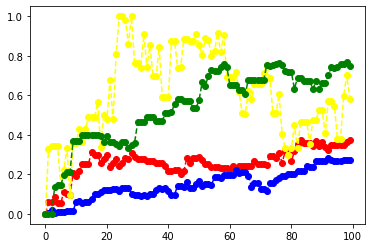

In [15]:
import math
import xlrd
import csv
import openpyxl
import matplotlib.pyplot as plt

label=[]            #ラベル
ave_list = []       #平均値リスト
min_max = []        #平均値リスト各々の最低温度と最高温度・そのポインタのリスト
all_min_max = []    #平均値リスト全体の最低温度と最大温度
min_max_100 = []    #list_100中の全体の最小最大リスト
list_100 = []       #平均値リスト各々の最低温度から100データ抜き出したリスト
normalize_100 = []  #正規化リスト

min_lb = 30015      #ラベルの最低温度

#------------------------------------------------------------------------------------
#ラベルの作成
def make_Label():
    label.append(0)
    for i in range(0, 101):
        label.append(min_lb + 10*i)

#先頭行にラベルの挿入
def insert_Label(filename):
    with open(filename + ".csv", "r") as f:
        r = csv.reader(f)
        orig = list(r)
    
    with open(filename + "_out.csv", "w", newline='') as f:
        w = csv.writer(f)
        w.writerow(label)
        w.writerows(orig)
#------------------------------------------------------------------------------------
#平均の計算・保存とマスターcsvの作成
def calc_Average(filename):
    temp = []                   #マスターcsvに平均値追加後データを書き込むための一時リスト
    ave_list_elements = []      #平均値リストの配列要素(1次元)
    with open(filename + "_out.csv", "r") as f:
        r = csv.reader(f)
        for row in r:
            ave = 0
            counter = 0
            if row[1] == str(min_lb):
                continue;
            for i in range(1, len(label) - 1):
                ave += label[i] * int(row[i])
                counter += int(row[i])
            ave /= counter
            row[len(label)] = ave
            temp.append(row)
            
            ave_list_elements.append(ave)
            
        #平均値リストにデータ追加(2次元)
        ave_list.append(ave_list_elements)
    
    with open(filename + "_master.csv", "w", newline='') as f:
        w = csv.writer(f)
        w.writerow(label)
        w.writerows(temp)
#------------------------------------------------------------------------------------    
#正規化リストの作成
def normalization():
    
    #最小値最大値を求める
    def min_Max():
        for i in range(0, len(ave_list)):
            for j in range(0, len(ave_list[i])):
                if j == 0:
                    #最小値最大値
                    mini = ave_list[i][j]
                    maxi = ave_list[i][j]
                    #最小値最大値のポインタ
                    mini_p = j
                    maxi_p = j

                if ave_list[i][j] < mini:
                    mini = ave_list[i][j]
                    mini_p = j
                if ave_list[i][j] > maxi:
                    maxi = ave_list[i][j]
                    maxi_p = j
            
            #データ列ごとの最小最大値リストへの追加と全体の最小最大値を求める
            min_max.append([mini, maxi, mini_p, maxi_p])
            if i == 0:
                all_mini = mini
                all_maxi = maxi
            
            if all_mini < mini:
                all_mini = mini
            if all_maxi > maxi:
                all_maxi = maxi
        
        all_min_max.append(all_mini)
        all_min_max.append(all_maxi)
        #最小値から100データ分の最大値探索
        mini_100 = ave_list[0][min_max[0][2]]
        maxi_100 = ave_list[0][min_max[0][2]]
        for i in range(0, len(min_max)):
            for k in range(min_max[i][2], min_max[i][2] + 100):
                if ave_list[i][k] > maxi_100:
                    maxi_100 = ave_list[i][k]
                if ave_list[i][k] < mini_100:
                    mini_100 = ave_list[i][k]
                    
        min_max_100.append(mini_100)
        min_max_100.append(maxi_100)
        
    #最小値から100データ抜き出す
    def extract_100(mm):
        counter = -1
        for l in ave_list:
            counter += 1
            temp_before = []
            temp_normalized = []
            for i in range(min_max[counter][2], min_max[counter][2] + 100):
                temp_before.append(l[i])
                temp_normalized.append((l[i] - min_max[counter][0])/(mm[1] - min_max[counter][0]))
                
            list_100.append(temp_before)
            normalize_100.append(temp_normalized)
        print("正規化")
        print(normalize_100)
        print("最小値最大値")
        print(min_max)

    min_Max()
    extract_100(min_max_100)
    
#------------------------------------------------------------------------------------
#ユークリッド距離
def distance(test, training):
    squares = [(test[i] - training[i]) ** 2 for i in range(0, len(test))]
    sum_of_sqrt = math.sqrt(sum(squares))
    return 1/(1 + sum_of_sqrt)

#------------------------------------------------------------------------------------
#ピアソンの積率相関係数(PCC)
def pearson(test, training):
    n = len(test)
    test_mean = sum([test[i] for i in range(0, n)]) / n
    training_mean = sum([training[i] for i in range(0, n)]) / n
    test_variance = math.sqrt(sum([((test[i] - test_mean) ** 2) for i in range(0, n)]))
    training_variance = math.sqrt(sum([((training[i] - training_mean) ** 2) for i in range(0, n)]))

    covariance = sum([(test[i] - test_mean)*(training[i] - training_mean) for i in range(0, n)])

    if test_variance * training_variance == 0: return 0

    return covariance / (test_variance * training_variance)
#------------------------------------------------------------------------------------
#デバッグ用グラフ表示
def plot_Graph():
    #x軸のラベル
    label_x = [i for i in range(0, 100)]
        
    plt.plot(label_x, normalize_100[0], marker="o", color = "red", linestyle = "--")
    plt.plot(label_x, normalize_100[1], marker="o", color = "blue", linestyle = "--")
    plt.plot(label_x, normalize_100[2], marker="o", color = "yellow", linestyle = "--")
    plt.plot(label_x, normalize_100[3], marker="o", color = "green", linestyle = "--");
#------------------------------------------------------------------------------------

if __name__ == '__main__':
    #ラベル作成
    make_Label()
    #ラベルを付ける+平均を出して各々master.csvを作成
    insert_Label("dl")
    insert_Label("ds")
    insert_Label("sl")
    insert_Label("ss")
    
    calc_Average("dl")
    calc_Average("ds")
    calc_Average("sl")
    calc_Average("ss")

    #正規化
    normalization()

    print("Euclid")
    print("深長 : " + str(distance(normalize_100[0], normalize_100[1])))
    print("Pearson")
    print("深長 : " + str(pearson(normalize_100[0], normalize_100[1])))
    plot_Graph()